# Visualizing distributions

# Histograms
- ### A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars

- ### Histograms are good for showing general distributional features of dataset variables. You can see roughly where the peaks of the distribution are, whether the distribution is skewed or symmetric, and if there are any outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Here is a histogram of salaries for various jobs in Australia. Each row of the dataset is the average salary for that job, so the counts are counts of jobs.

Data Source: https://github.com/rfordatascience/tidytuesday/blob/master/data/2018/2018-04-23/week4_australian_salary.csv

In [6]:
salary_dataset = pd.read_csv("week4_australian_salary.csv", encoding='latin1')

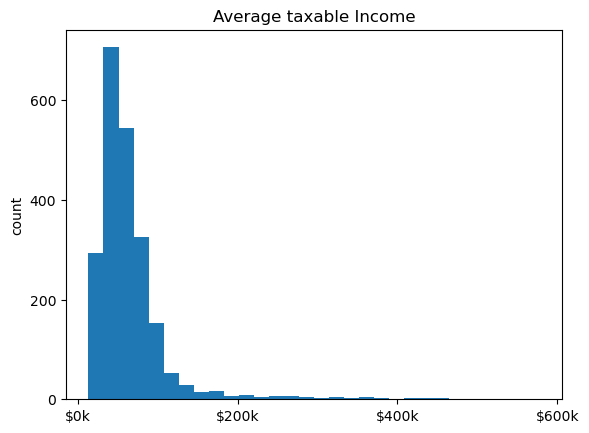

In [7]:
plt.hist(salary_dataset['average_taxable_income'], bins=30)
plt.title("Average taxable Income")
plt.xticks(ticks=[0, 200000, 400000, 600000], labels=['$0k', '$200k', '$400k', '$600k'])
plt.yticks(ticks=[0, 200, 400, 600])
plt.ylabel('count')
plt.show()

# Box plots
- ### a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also termed as the box-and-whisker plot and the box-and-whisker diagram. 

## Here are box plots of cigarette consumption per person in the USA from 1985 to 1995 (Alaska and Hawaii are not included). Each observation in the dataset is the average number of packets of cigarette smoked per person in one state in one year. Thus each box plot represents the distribution of 48 data points (because there are 48 US states included in the dataset).

Data Source: https://www.rdocumentation.org/packages/Ecdat/versions/0.4-2/topics/Cigarette

In [8]:
# transform rda format into pandas dataframe
import pyreadr
result = pyreadr.read_r('Cigarette.rda')
# extract the pandas data frame for object
cigarette_dataset = result['Cigarette']

In [9]:
cigarette_dataset_1985 = cigarette_dataset[cigarette_dataset['year'] == 1985]
cigarette_dataset_1986 = cigarette_dataset[cigarette_dataset['year'] == 1986]
cigarette_dataset_1987 = cigarette_dataset[cigarette_dataset['year'] == 1987]
cigarette_dataset_1988 = cigarette_dataset[cigarette_dataset['year'] == 1988]
cigarette_dataset_1989 = cigarette_dataset[cigarette_dataset['year'] == 1989]
cigarette_dataset_1990 = cigarette_dataset[cigarette_dataset['year'] == 1990]
cigarette_dataset_1991 = cigarette_dataset[cigarette_dataset['year'] == 1991]
cigarette_dataset_1992 = cigarette_dataset[cigarette_dataset['year'] == 1992]
cigarette_dataset_1993 = cigarette_dataset[cigarette_dataset['year'] == 1993]
cigarette_dataset_1994 = cigarette_dataset[cigarette_dataset['year'] == 1994]
cigarette_dataset_1995 = cigarette_dataset[cigarette_dataset['year'] == 1995]

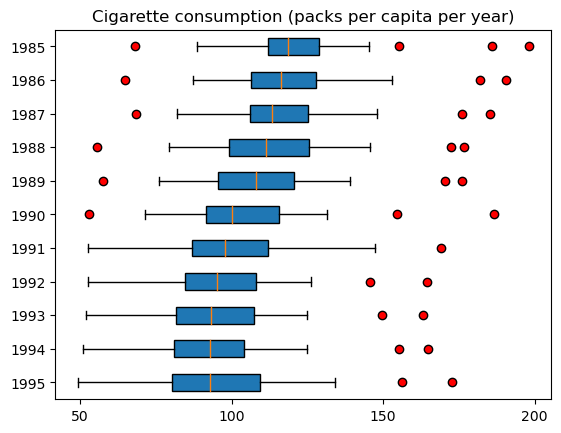

In [10]:
fig, ax = plt.subplots()
data = [
    cigarette_dataset_1995['packpc'],
    cigarette_dataset_1994['packpc'],
    cigarette_dataset_1993['packpc'],
    cigarette_dataset_1992['packpc'],
    cigarette_dataset_1991['packpc'],
    cigarette_dataset_1990['packpc'],
    cigarette_dataset_1989['packpc'],
    cigarette_dataset_1988['packpc'],
    cigarette_dataset_1987['packpc'],
    cigarette_dataset_1986['packpc'],
    cigarette_dataset_1985['packpc']
]
ax.boxplot(data, vert=False, patch_artist=True, flierprops={'markerfacecolor':'r'})
plt.title('Cigarette consumption (packs per capita per year)')
plt.xticks([50, 100, 150, 200])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986','1985'])
plt.show()

# Scatter plot

- ### Scatter plots are used to observe relationships between variables.
- ### The data is displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

## Here you can see a scatter plot of average life expectancy (on the y-axis) versus average length of schooling (on the x-axis) for countries around the world. Each point in the plot represents one country. A straight trend line from a linear regression model is shown.

Data Source: https://hdr.undp.org/data-center/country-insights#/ranks

In [40]:
life_exp = pd.read_excel(
    'HDR21-22_Statistical_Annex_HDI_Table.xlsx', 
    nrows=194, 
    skiprows=[0, 1, 2, 3, 5, 6, 7, 74, 124, 169], 
    usecols=[1, 4, 6],
    names=['Country', 'Life expectancy at birth', 'Expected years of schooling']
)

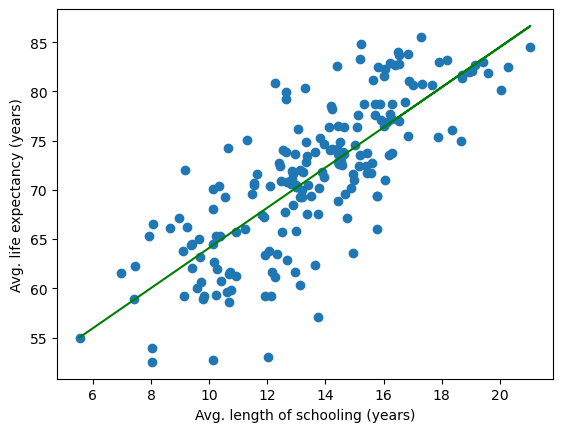

In [43]:
# create scatter plot of life_expectancy vs length of schooling
plt.scatter(life_exp['Expected years of schooling'], life_exp['Life expectancy at birth'], marker='o')
plt.ylabel('Avg. life expectancy (years)')
plt.xlabel('Avg. length of schooling (years)')

# draw linear regression line to visualize level of correlation
plt.plot(life_exp['Expected years of schooling'], m*life_exp['Expected years of schooling']+b, color='green')
m, b = np.polyfit(life_exp['Expected years of schooling'], life_exp['Life expectancy at birth'], 1)
plt.show()

# Line plot
- ### a type of chart which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments.

In [52]:
# create a dataframe with unemployment rate of imaginary country
unemployment_rate = pd.DataFrame({'year': [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010],
        'unemployment_rate': [9.8, 12, 8, 7.2, 6.9, 7, 6.5, 6.2, 5.5, 6.3]
       })

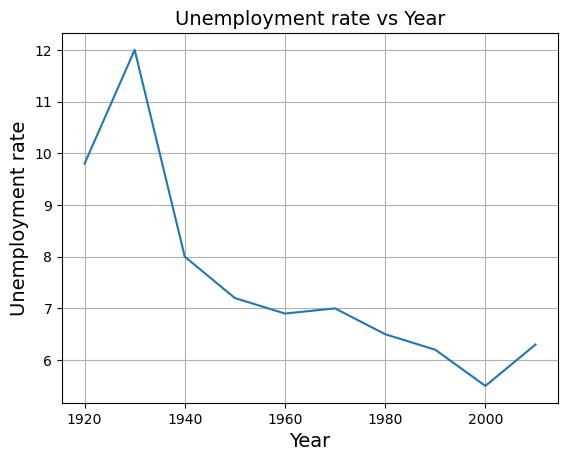

In [54]:
# draw a line chart of Unemployment rate vs Year
plt.plot(unemployment_rate['year'], unemployment_rate['unemployment_rate'])
plt.title('Unemployment rate vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment rate', fontsize=14)
plt.grid(True)
plt.show()

# Bar plot
- ### is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

- ### If you care about percentages rather than counts, then stacked bar plots are often a good choice of plot.

## Vertical bar plot example

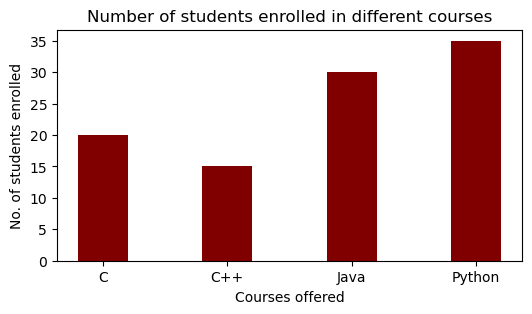

In [61]:

courses_df = pd.DataFrame(data={'C':20, 'C++':15, 'Java':30,'Python':35}, index=[0])
n_rows = len(courses_df)

fig = plt.figure(figsize = (6, 3))
 
for course in courses_df.columns:
    plt.bar(course, courses_df[course], width = 0.4, color ='maroon')


plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Number of students enrolled in different courses")
plt.show()

## Horizontal bar plot example

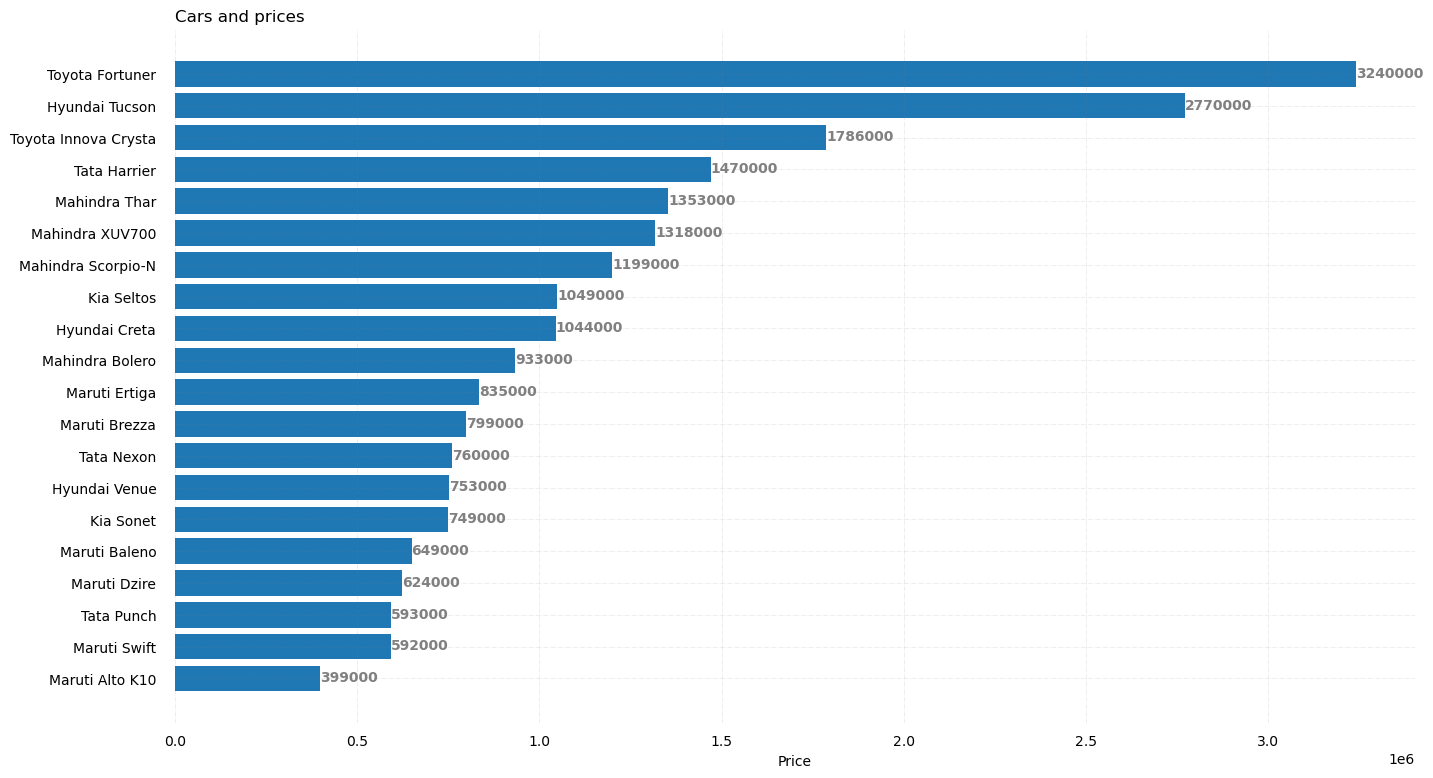

In [62]:
cars_df = pd.read_csv("cars.csv", nrows=20, usecols=['car_name', 'starting_price'])

cars_df_sorted = cars_df.sort_values('starting_price', ascending=False)
name = cars_df_sorted['car_name']
price = cars_df_sorted['starting_price']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price, data=cars_df_sorted)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# add title
ax.set_title('Cars and prices', loc ='left')

ax.set_xlabel('Price')

# Show Plot
plt.show()

## Stacked bar plot example

Data Source: https://www.kaggle.com/datasets/gregorut/videogamesales

Tutorial: https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

In [79]:
# data on video game copies sold worldwide
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


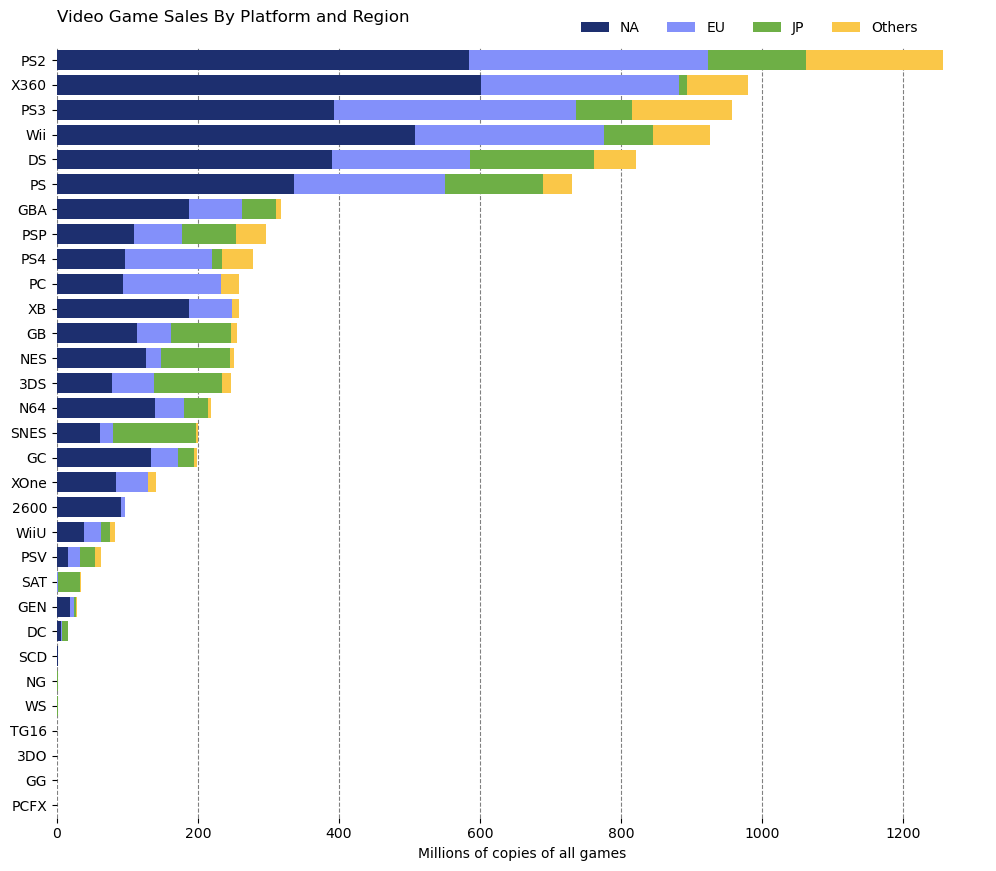

In [85]:
# Let's visualize the total number of copies sold by platform and analyze the regions where they were sold

vgsales_df_grouped = vgsales_df.groupby('Platform').sum(numeric_only=True)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']]

vgsales_df_grouped = vgsales_df_grouped.sort_values('Global_Sales')

fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']

# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))


# plot bars
left = len(vgsales_df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(vgsales_df_grouped.index, vgsales_df_grouped[name], left = left, color=colors[idx])
    left = left + vgsales_df_grouped[name]

# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()